In [10]:
from gaia_tools import query
import matplotlib
#matplotlib.use("AGG")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table
import pyexcel
from astropy import units as u
from astropy.coordinates import SkyCoord

import sklearn
from sklearn import cluster
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib.patches import Circle
#from matplotlib import patches

from PyPDF2 import PdfFileWriter, PdfFileReader

%pylab inline

import pywt
from galpy.util import bovy_plot

Populating the interactive namespace from numpy and matplotlib
/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"



In [11]:
# csv-pd set up for DBSCANN
GlobClust_Log_ra_dec = pd.read_csv('~/GlobClust_ra-dec.csv')
GlobClust_Log_r_t = GlobClust_Log_ra_dec.loc[5:5,"r_t"]
GlobClust_Log_radec = GlobClust_Log_ra_dec.loc[5:5,"RA":"DEC"]
GlobClust_Log_ID = GlobClust_Log_ra_dec.loc[5:5,"ID"]
GlobClust_Log_r_c = GlobClust_Log_ra_dec.loc[5:5,"r_c"]
GlobClust_Log_r_t = GlobClust_Log_ra_dec.loc[5:5,"r_t"]
#GlobClust_Log_dec = GlobClust_Log_ra_dec.loc[:,"dec"]
#GlobClust_Log_RA = GlobClust_Log_ra_dec.loc[0:7,"RA"]
#GlobClust_Log_DEC = GlobClust_Log_ra_dec.loc[0:7,"DEC"]
#print(GlobClust_Log_r_t)

print(GlobClust_Log_ID)

GlobClust_Log_2 = pd.read_csv('~/out_NGC 7492_full_15-rt_ra_dec.csv')
GlobClust_Log_pmra = GlobClust_Log_2.loc[:,"pmra"]
GlobClust_Log_pmdec = GlobClust_Log_2.loc[:,"pmdec"]
GlobClust_Log_ra = GlobClust_Log_2.loc[:,"ra"]
GlobClust_Log_dec = GlobClust_Log_2.loc[:,"dec"]

GlobClust_Log_g = GlobClust_Log_2.loc[:,"phot_g_mean_mag"]
GlobClust_Log_rp = GlobClust_Log_2.loc[:,"phot_rp_mean_mag"]
GlobClust_Log_bp = GlobClust_Log_2.loc[:,"phot_bp_mean_mag"]
GlobClust_Log_rpbp = GlobClust_Log_bp - GlobClust_Log_rp
GlobClust_Log_ra_out = GlobClust_Log_2.loc[:,"ra"]
GlobClust_Log_dec_out = GlobClust_Log_2.loc[:,"dec"]
GlobClust_Log_pmdec_out = GlobClust_Log_2.loc[:,"pmdec"]
GlobClust_Log_pmra_out = GlobClust_Log_2.loc[:,"pmra"]

#GlobClust_Log_pmra = GlobClust_Log_pmra.as_matrix()
#GlobClust_Log_pmdec = GlobClust_Log_pmdec.as_matrix()
#GlobClust_Log_ra = GlobClust_Log_ra.as_matrix()
#GlobClust_Log_dec = GlobClust_Log_dec.as_matrix()

GlobClust_Log_parallax_out = GlobClust_Log_2.loc[:,"parallax"]
GlobClust_Log_parallaxerror_out = GlobClust_Log_2.loc[:,"parallax_error"]
GlobClust_Log_parallaxe_out = GlobClust_Log_2.loc[:,"parallax":"parallax_error"]

# DBSCANN - parallax before scan
GlobClust_Log_parallaxover_out = GlobClust_Log_parallaxerror_out/GlobClust_Log_parallax_out

#parallax_indx = (GC_parallaxover>0.20) | ((1/GC_parallax>5.)*(GC_parallaxover<0.20))
parallax_indx=((1/GlobClust_Log_parallax_out<5.)*(GlobClust_Log_parallaxover_out<0.10))
parallax_indx=[not i for i in parallax_indx]

coord_ra_dec_deg=[]
coord_ra_dec = SkyCoord(GlobClust_Log_radec.loc[:,"RA"], GlobClust_Log_radec.loc[:,"DEC"], frame='icrs')

Clust_Edge = GlobClust_Log_r_c[5]
print(Clust_Edge)
Tidal_Edge = GlobClust_Log_r_t[5]
print(Tidal_Edge)
d_pc=26300

#M=m-5(log(d)-1)
GlobClust_Log_M = GlobClust_Log_g-5*((np.log10(d_pc)) - 1)

indx = (np.sqrt((np.fabs(GlobClust_Log_ra_out-coord_ra_dec.ra.deg)**2+np.fabs(GlobClust_Log_dec_out-coord_ra_dec.de\
c.deg)**2))<Clust_Edge/60)

shape(GlobClust_Log_2)

5    NGC 7492
Name: ID, dtype: object
/home/kaderali/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))

0.86
4.513344158


(17836, 13)

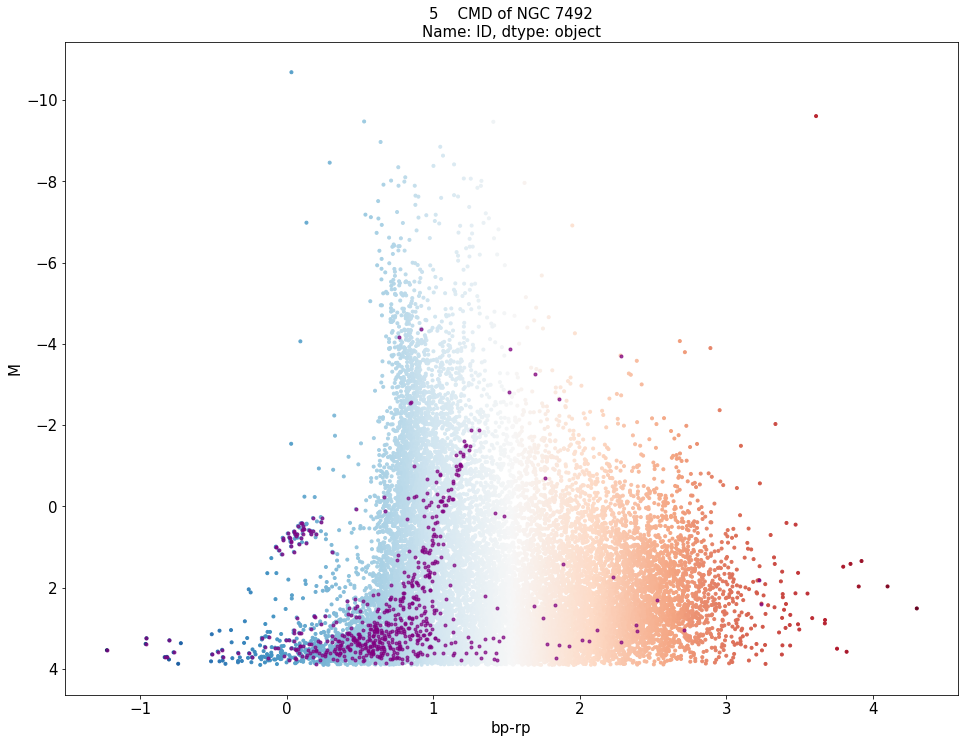

In [12]:
indx = (sqrt((np.fabs(GlobClust_Log_ra_out-coord_ra_dec.ra.deg)**2+np.fabs(GlobClust_Log_dec_out-coord_ra_dec.dec.deg)**2))
        <Tidal_Edge/60)
#print(coord_ra_dec.ra.deg[2],coord_ra_dec.dec.deg[2])
#(np.fabs(GlobClust_Log_ra_out-GlobClust_Log_ra_out.mean())<Clust_Edge[i]/60)*\
#(np.fabs(GlobClust_Log_dec_out-GlobClust_Log_dec_out.mean())<Clust_Edge[i]/60)  #have used 1.1 & 0.35 for NGC 288
    
fig=plt.figure(figsize=(16,12))
plt.scatter(x=GlobClust_Log_rpbp, y=GlobClust_Log_M, c=GlobClust_Log_rpbp, cmap='RdBu_r', marker='.')
plt.scatter(x=GlobClust_Log_rpbp[indx], y=GlobClust_Log_M[indx], c='purple', alpha=0.7, marker='.') #core stars
plt.xlabel('bp-rp', fontsize=15)
plt.ylabel('M', fontsize=15)
plt.title('CMD of ' + GlobClust_Log_ID, fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.gca().invert_yaxis()
plt.show()

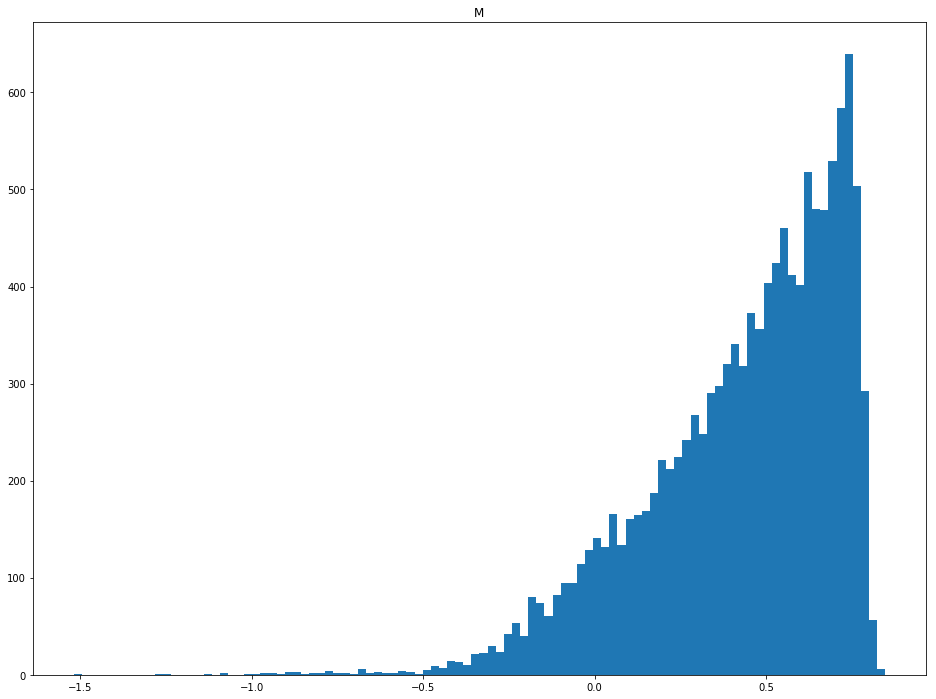

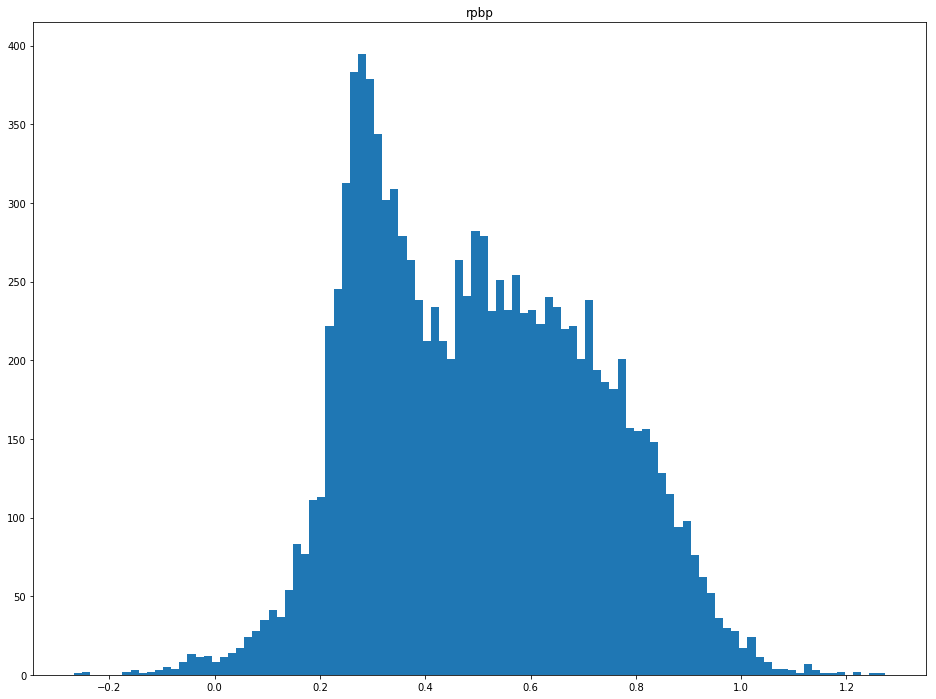

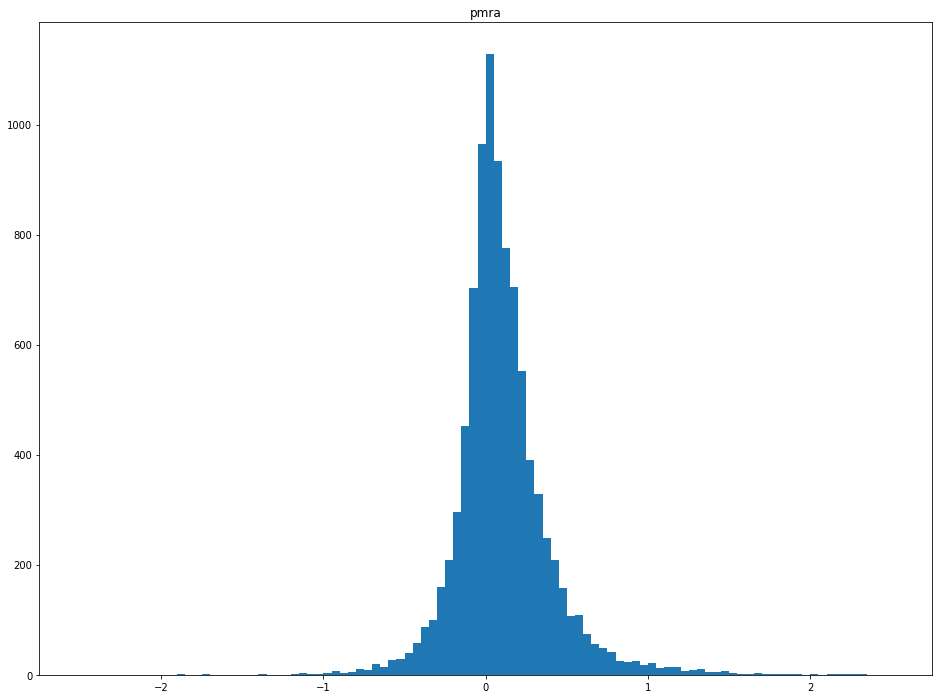

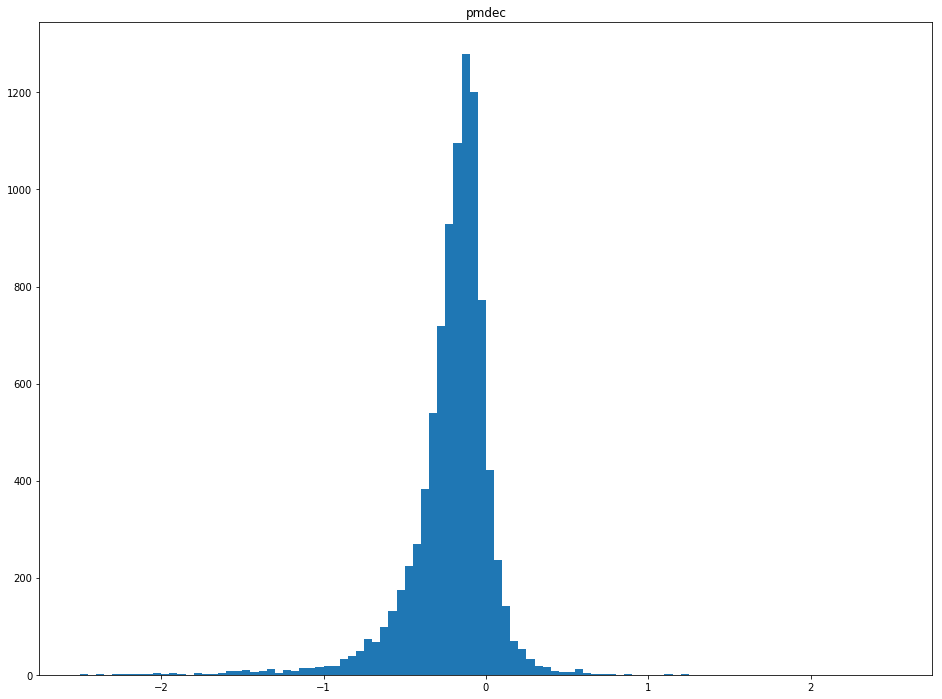

In [17]:
fig=plt.figure(figsize=(16,12))
plt.hist(GlobClust_Log_M[parallax_indx][clust_edge2]/5, bins=100)#, range=[-1.5,4.5])
plt.title('M')

fig=plt.figure(figsize=(16,12))
plt.hist(GlobClust_Log_rpbp[parallax_indx][clust_edge2].dropna()/3, bins=100)#, range=[0.1,1.3])
plt.title('rpbp')

fig=plt.figure(figsize=(16,12))
plt.hist(GlobClust_Log_pmra[parallax_indx][clust_edge2].dropna()/40, bins=100, range=[-2.5,2.5])
plt.title('pmra')

fig=plt.figure(figsize=(16,12))
plt.hist(GlobClust_Log_pmdec[parallax_indx][clust_edge2].dropna()/40, bins=100, range=[-2.5,2.5])
plt.title('pmdec')

plt.show()

(9371, 4)
[-1 -1 -1 ... -1 -1 -1]
(9371,)
Estimated number of Subgroups: 3


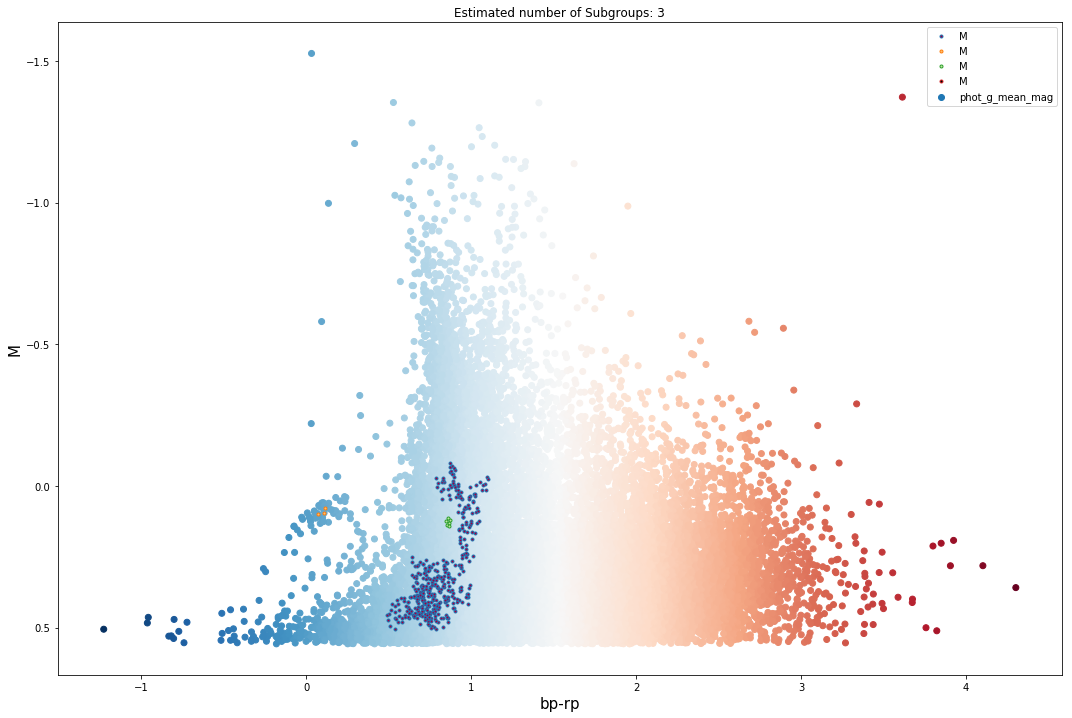

(411, 1)

 pmra    0.590961
dtype: float64 


 pmdec   -3.395166
dtype: float64


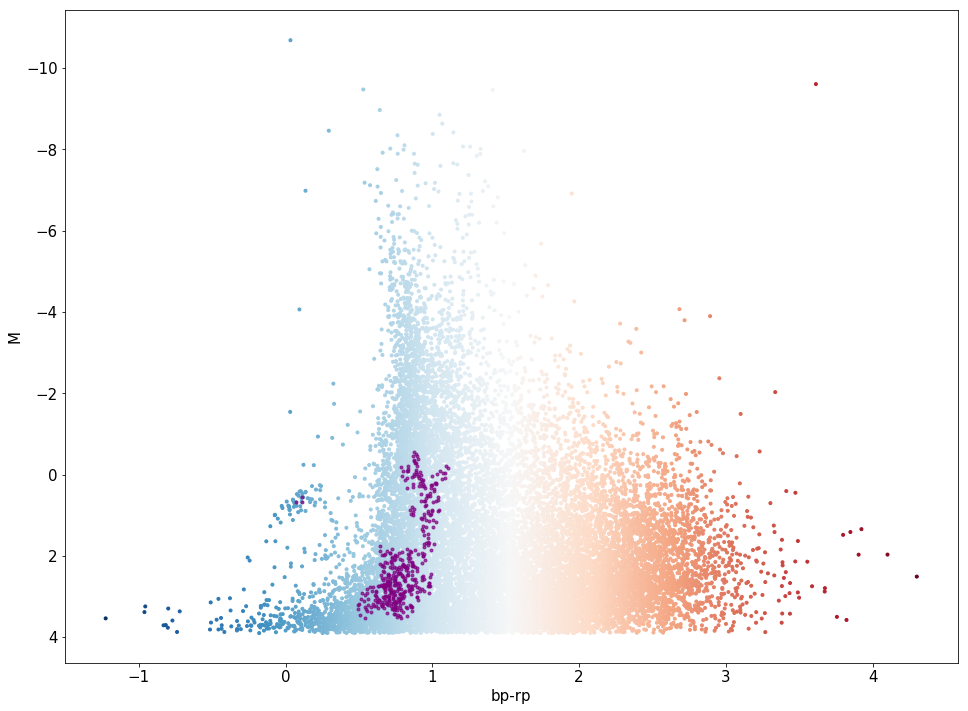

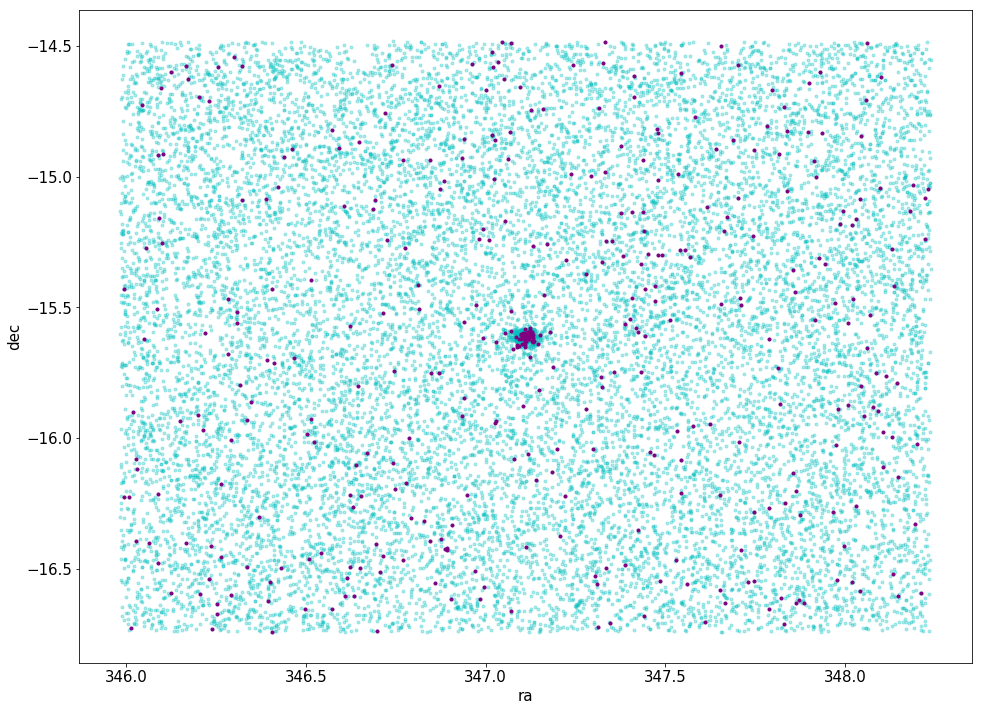

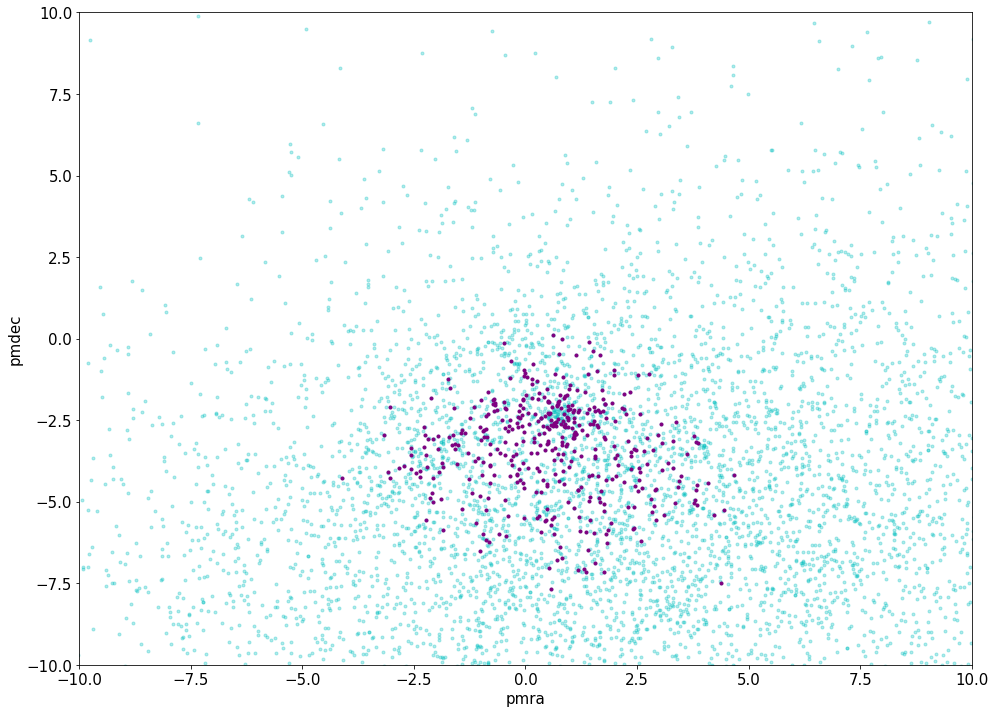

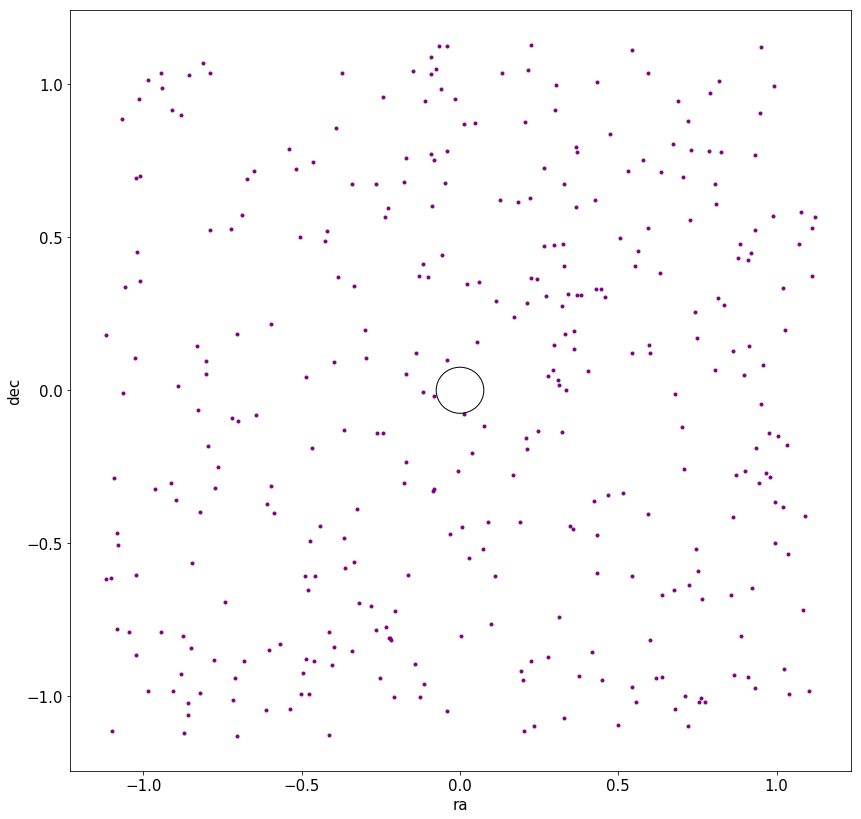

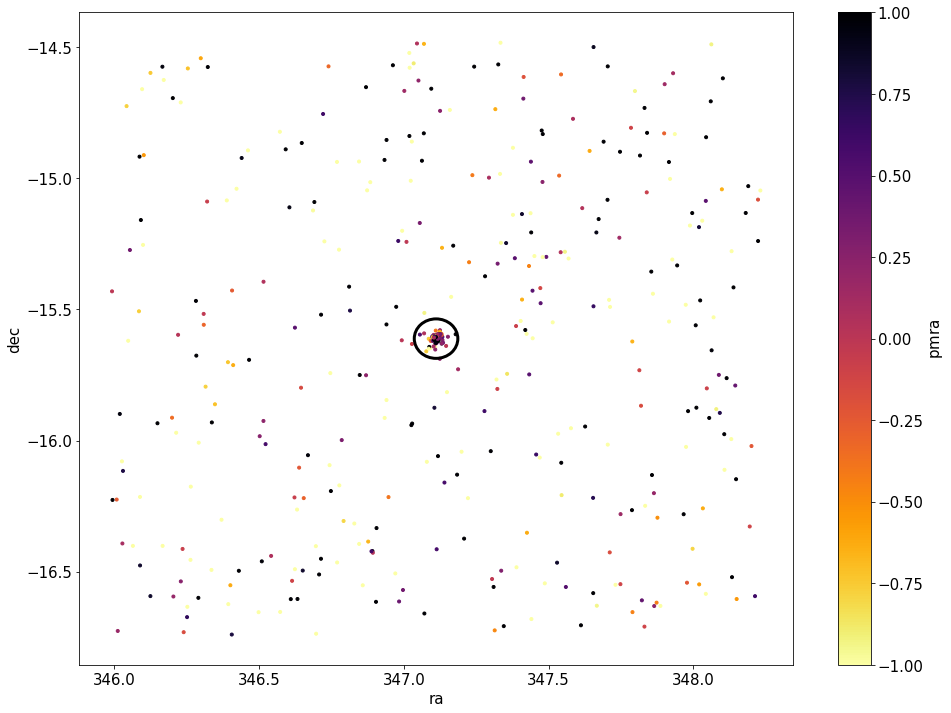

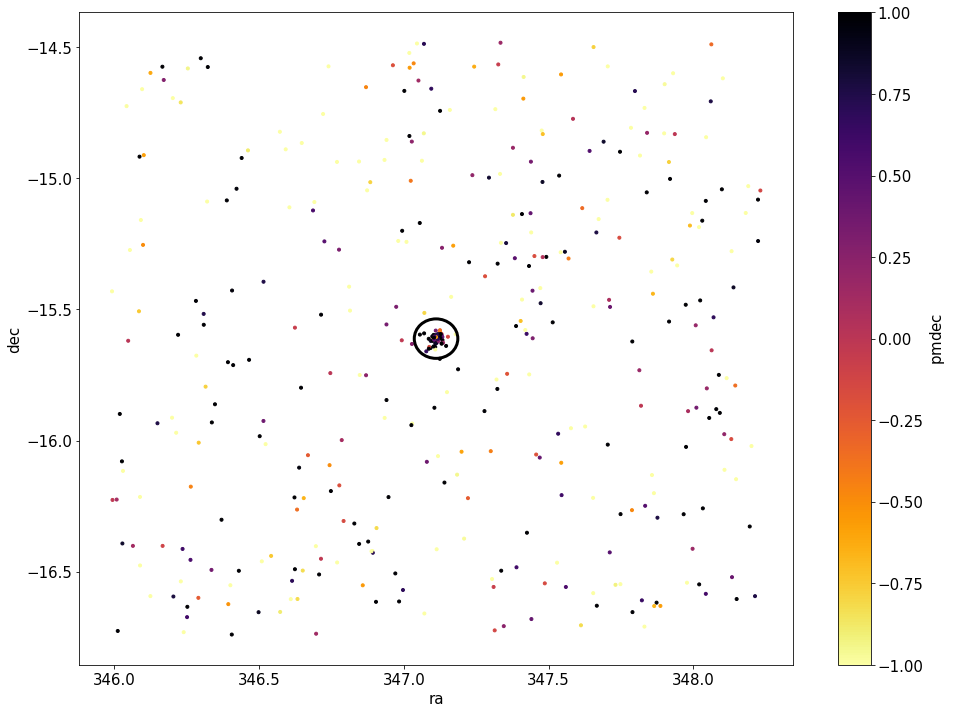

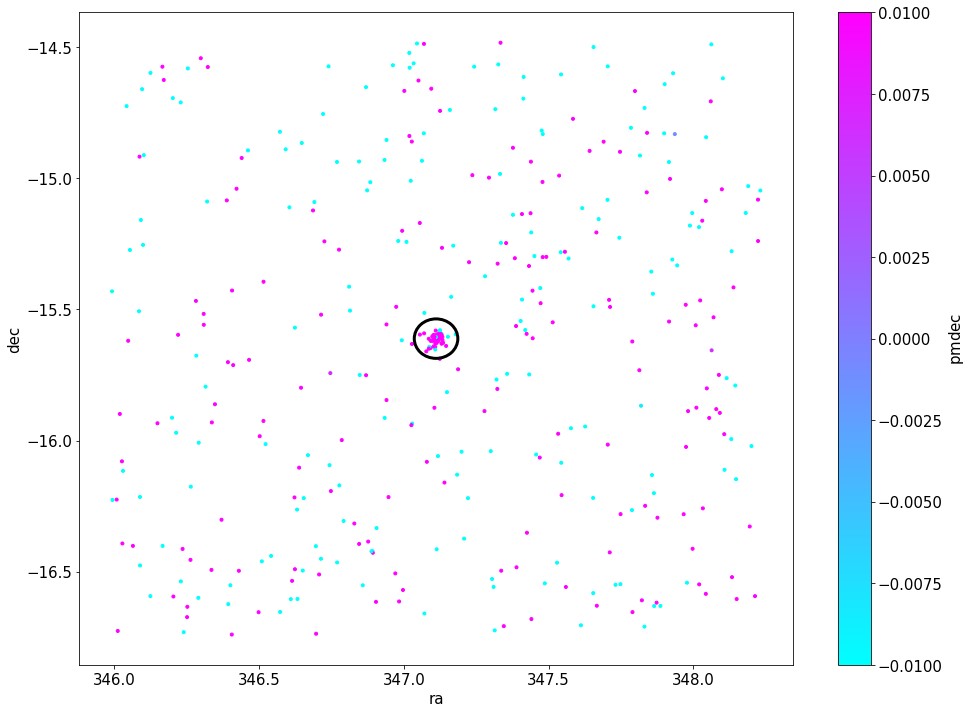

411 411
(411,)
(345, 1)
(345, 1)
[0.    0.006 0.012 0.018 0.024 0.03  0.036 0.042 0.048 0.054 0.06  0.066
 0.072 0.078 0.084 0.09  0.096]
(411, 1)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:402: RuntimeWarning: invalid value encountered in log10

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:403: RuntimeWarning: invalid value encountered in log10

(345,)


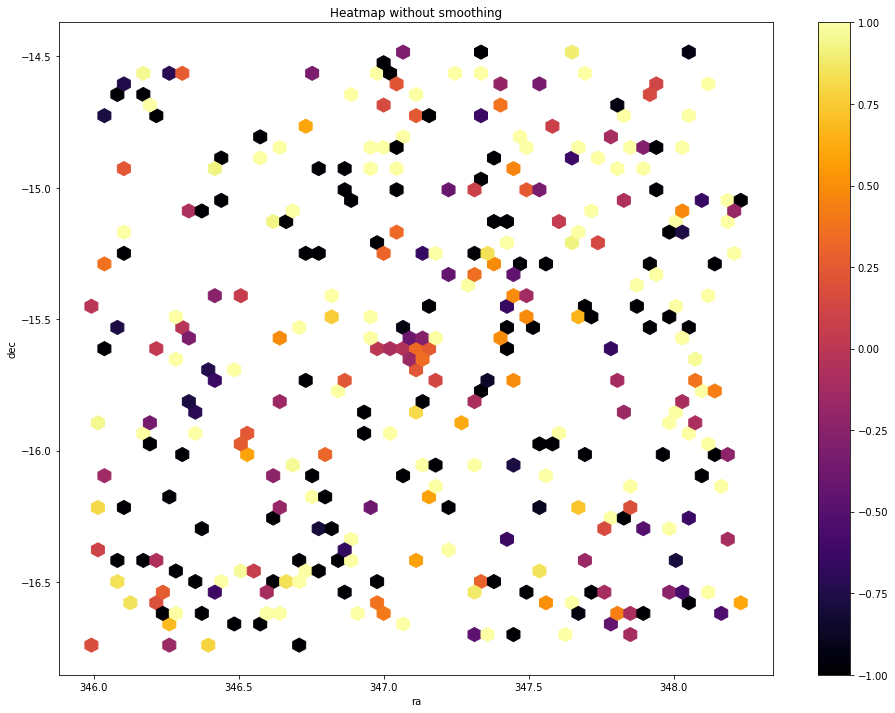

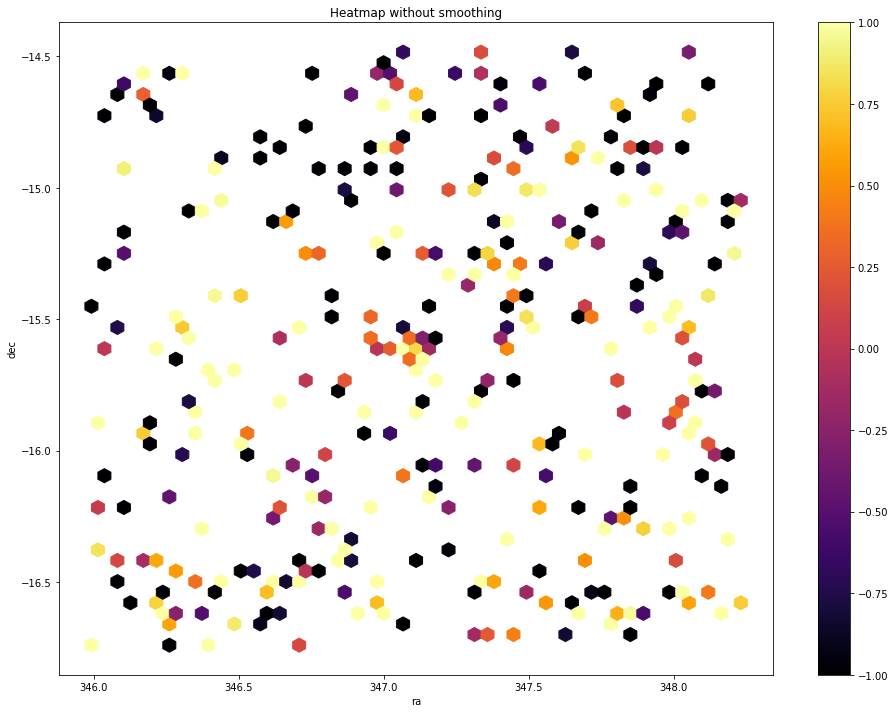

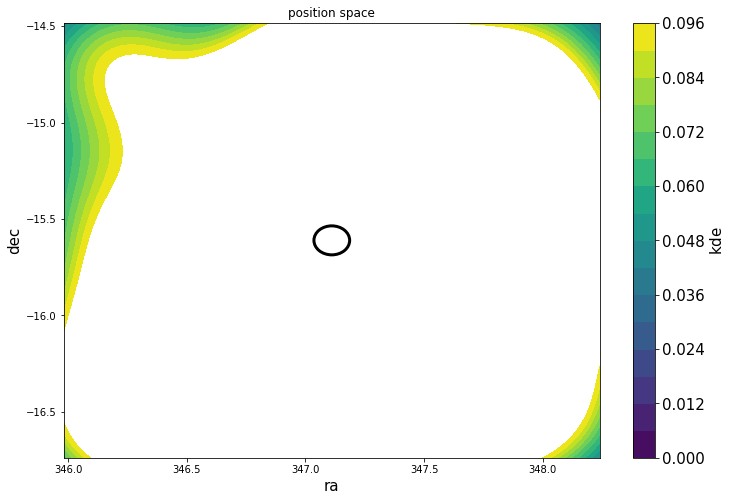

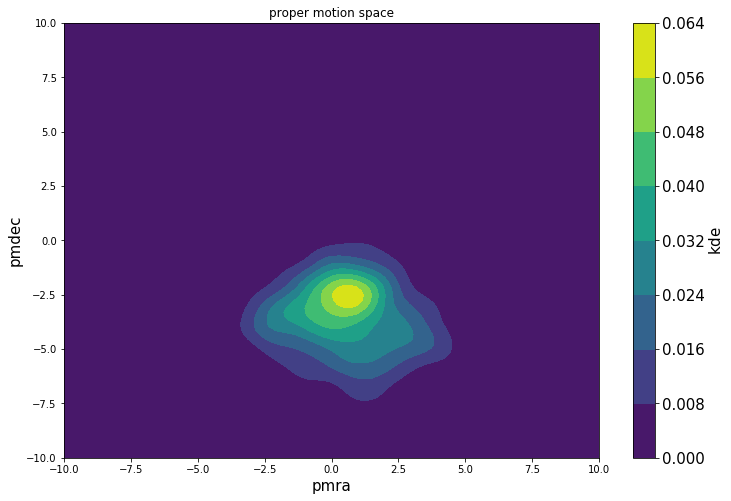

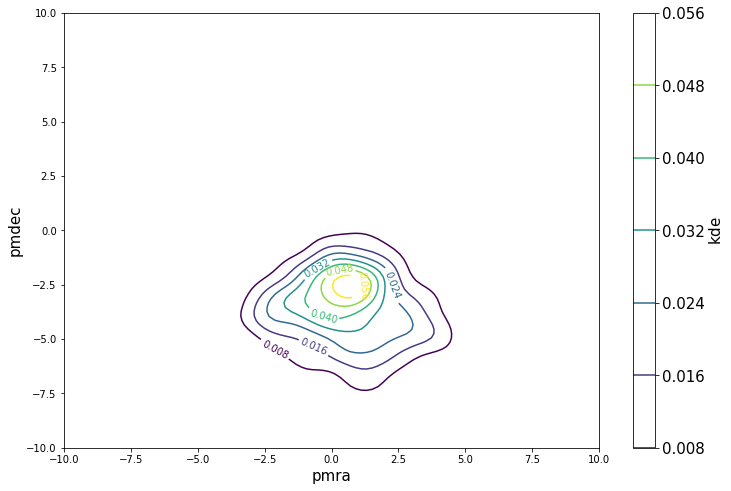

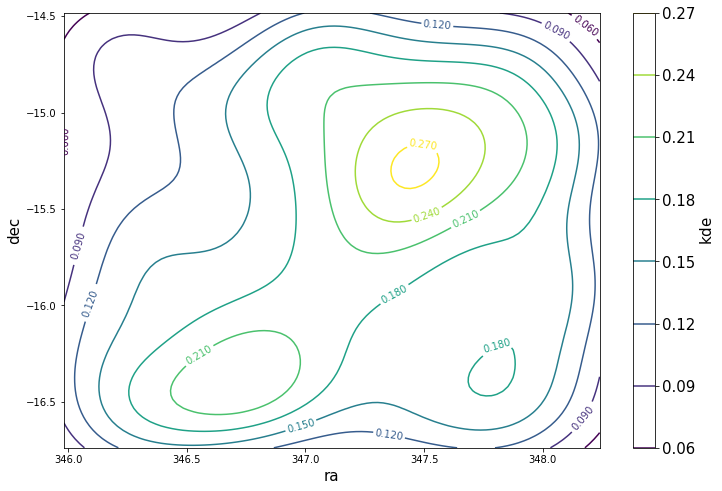

In [13]:
# DBSCAN
DB_Params =[]
DB_Params=np.transpose(DB_Params)

clust_edge2 = (np.sqrt((np.fabs(GlobClust_Log_ra_out[parallax_indx].as_matrix()-coord_ra_dec.ra.deg)**2+
                        np.fabs(GlobClust_Log_dec_out[parallax_indx].as_matrix()-coord_ra_dec.dec.deg)**2))
              >Tidal_Edge/60)

DF={'M': GlobClust_Log_M[parallax_indx]/7, 
    'rpbp': GlobClust_Log_rpbp[parallax_indx], 
    'pmra': GlobClust_Log_pmra[parallax_indx]/50, 'pmdec': GlobClust_Log_pmdec[parallax_indx]/50}

DB_Params = pd.DataFrame(data=DF)
DB_Params=DB_Params.dropna()

print(shape(DB_Params))

db=sklearn.cluster.DBSCAN(eps=0.06, min_samples=15, metric='euclidean', metric_params=None, algorithm='auto', 
                      leaf_size=30, p=None, n_jobs=1).fit(DB_Params) #original eps=0.1625
#db=sklearn.cluster.DBSCAN(eps=0.013, min_samples=25, metric='euclidean', metric_params=None, algorithm='auto', 
#                      leaf_size=30, p=None, n_jobs=1).fit(DB_Params) #original eps=0.1625

print(db.labels_)
print(shape(db.labels_))

fig=plt.figure(figsize=(18,12))
plt.scatter(GlobClust_Log_rpbp/1, GlobClust_Log_M/7, c=GlobClust_Log_rpbp/1, cmap='RdBu_r')
#plt.scatter(db,DB_Params)
#plt.show()

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of Subgroups: %d' % n_clusters_)

x_param3=[]
y_param3=[]

x_param4=[]
y_param4=[]

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    #NOISE
    #xy = DB_Params[class_member_mask & ~core_samples_mask]
    #plt.plot(xy.loc[:, "rpbp"], xy.loc[:, "M"], 'o', markerfacecolor=tuple(col),
    #         markeredgecolor='k', markersize=6)
    
    #CLEANED DATA
    xy = DB_Params[class_member_mask & core_samples_mask]
    
    plt.plot(xy.loc[:, "rpbp"], xy.loc[:, "M"], '.', markerfacecolor=tuple(col),)
     #       )#markeredgecolor='k')#, markersize=14)
    
    x_param3.append(xy.loc[:, "rpbp"])
    #y_param3=x_param3
    y_param3.append(xy.loc[:, "M"]*7)

    #x_param4.append(xy.loc[:, "pmra"]*0.35)
    #y_param4.append(xy.loc[:, "pmdec"]*0.3)
    
    #x_param5.append(xy.loc[:, "ra"]*0.35)
    #y_param5.append(xy.loc[:, "dec"]*0.3)

plt.gca().invert_yaxis()
plt.title('Estimated number of Subgroups: %d' % n_clusters_)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
plt.xlabel('bp-rp', fontsize=15)
plt.ylabel('M', fontsize=15)

plt.legend()
plt.show()
#fig.savefig('GC_DBSCAN'+ GlobClust_Log_ID[0] +'eps0p165-mins10_coreCMD-fullsetiponfullcmd.png')

x_out3 = pd.DataFrame(x_param3)#, index=None)#, mangle_dupe_cols=True)
#x_out3.reset_index()
x_out3 = x_out3.transpose() 
x_out3 = x_out3.loc[:,~x_out3.columns.duplicated()]
#x_out3 = x_out3["rpbp"].as_matrix()
x_out3

y_out3 = pd.DataFrame(y_param3)#, index=None)#, mangle_dupe_cols=True)
#y_out3.reset_index()
y_out3 = y_out3.transpose() 
y_out3 = y_out3.loc[:,~y_out3.columns.duplicated()]
#y_out3 = y_out3["M"].as_matrix()
print(shape(y_out3))

GC_ra = pd.DataFrame({'ra':GlobClust_Log_ra})
GC_dec = pd.DataFrame({'dec':GlobClust_Log_dec})
GC_pmra = pd.DataFrame({'pmra':GlobClust_Log_pmra})
GC_pmdec = pd.DataFrame({'pmdec':GlobClust_Log_pmdec})

ra_DB = GC_ra.reindex(x_out3.index)
dec_DB = GC_dec.reindex(y_out3.index)
pmra_DB = GC_pmra.reindex(x_out3.index)
pmdec_DB = GC_pmdec.reindex(y_out3.index)
M_DB = GlobClust_Log_M.reindex(y_out3.index)
rpbp_DB = GlobClust_Log_rpbp.reindex(y_out3.index)

pmra_DB_norm = (pmra_DB-pmra_DB.mean())#/(pmra_DB.mean())
pmdec_DB_norm = (pmdec_DB-pmdec_DB.mean())#/(pmdec_DB.mean())

print('\n', pmra_DB.mean(), '\n')
print('\n', pmdec_DB.mean())


fig=plt.figure(figsize=(16,12))
plt.scatter(x=GlobClust_Log_rpbp, y=GlobClust_Log_M, c=GlobClust_Log_rpbp, cmap='RdBu_r', marker='.')
plt.scatter(x=rpbp_DB, y=M_DB, c='purple', alpha=0.7, marker='.')
#plt.scatter(x=rpbp_ic, y=M_ic, c='g', alpha=0.2, marker='.')
plt.xlabel('bp-rp', fontsize=15)
plt.ylabel('M', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.gca().invert_yaxis()
plt.show()

fig=plt.figure(figsize=(16,12))
plt.scatter(x=GlobClust_Log_ra_out, y=GlobClust_Log_dec_out, c='c', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=ra_DB, y=dec_DB, c='purple', marker='.')#, alpha=0.2)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.show()

fig=plt.figure(figsize=(16,12))
#plt.hexbin(GlobClust_Log_pmdec_out, GlobClust_Log_pmra_out, extent=[-10,10, -10,10], bins='log',gridsize=200)
plt.scatter(x=GlobClust_Log_pmra_out[parallax_indx] , y=GlobClust_Log_pmdec_out[parallax_indx], c='c', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(y=pmdec_DB, x=pmra_DB, c='purple', marker='.')#, alpha=0.2)
plt.xlabel('pmra', fontsize=15)
plt.ylabel('pmdec', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
#plt.gca().set_ylim([-7.5, -4.5])
#plt.gca().set_xlim([2.5,6])
plt.gca().set_ylim([-10,10])
plt.gca().set_xlim([-10,10])
#plt.gca().set_ylim([3.2, 4.7])
#plt.gca().set_xlim([-7.5,-3])
plt.show()

clust_indx = (np.sqrt((np.fabs(ra_DB.as_matrix()-coord_ra_dec.ra.deg)**2+np.fabs(dec_DB.as_matrix()-coord_ra_dec.dec.deg)**2))
              >Tidal_Edge/60)
#(np.sqrt(np.fabs((ra_DB-coord_ra_dec.ra.deg)**2+(dec_DB-coord_ra_dec.dec.deg)**2))<Clust_Edge/60)


fig=plt.figure(figsize=(14,14))
ax = plt.gca()
#plt.scatter(x=GlobClust_Log_pmra_out, y=GlobClust_Log_pmdec_out, c='c', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=ra_DB[clust_indx]-coord_ra_dec.ra.deg, y=dec_DB[clust_indx]-coord_ra_dec.dec.deg, c='purple', marker='.')#, alpha=0.2)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
circle = plt.Circle((0,0), GlobClust_Log_r_t/60*4, color='b', fill=False, lw=2)
#ax.add_artist(circle)
circle2 = plt.Circle((0,0), GlobClust_Log_r_t[5]/60, color='k', fill=False, lw=1)
ax.add_artist(circle2)
circle3 = plt.Circle((0,0), 5/60, color='pink', fill=False, lw=2)
#ax.add_artist(circle3)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
#plt.gca().set_ylim([-2, 2])
#plt.gca().set_xlim([-2,2])
plt.gca().tick_params(labelsize=15)
plt.show()


fig=plt.figure(figsize=(16,12))
ax = plt.gca()
#plt.scatter(x=GlobClust_Log_ra_out, y=GlobClust_Log_dec_out, c='c', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=ra_DB, y=dec_DB, c=pmra_DB_norm, cmap='inferno_r', marker='.', vmin=-1, vmax=1)#, alpha=0.2)
#plt.scatter(x=ra_DB, y=dec_DB, c=pmdec_DB_norm, cmap='inferno', marker='.', vmin=-1, vmax=1)#, alpha=0.2)
circle = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t/60*4, color='b', fill=False, lw=5)
#ax.add_artist(circle)
circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[5]/60, color='k', fill=False, lw=3)
ax.add_artist(circle2)
circle3 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), 5/60, color='pink', fill=False, lw=2)
#ax.add_artist(circle3)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{pmra}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.show()

fig=plt.figure(figsize=(16,12))
ax = plt.gca()
#plt.scatter(x=GlobClust_Log_ra_out, y=GlobClust_Log_dec_out, c='c', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=ra_DB, y=dec_DB, c=pmdec_DB_norm, cmap='inferno_r', marker='.', vmin=-1, vmax=1)#vmin=-0.1, vmax=.1)#, alpha=0.2)
circle = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t/60*4, color='b', fill=False, lw=5)
#ax.add_artist(circle)
circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[5]/60, color='k', fill=False, lw=3)
ax.add_artist(circle2)
circle3 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), 5/60, color='pink', fill=False, lw=2)
#ax.add_artist(circle3)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.show()

fig=plt.figure(figsize=(16,12))
ax = plt.gca()
#plt.scatter(x=GlobClust_Log_ra_out, y=GlobClust_Log_dec_out, c='c', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=ra_DB, y=dec_DB, c=pmdec_DB_norm, cmap='cool', marker='.', vmin=-0.01, vmax=0.01)#vmin=-0.1, vmax=.1)#, alpha=0.2)
circle = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t/60*4, color='b', fill=False, lw=5)
#ax.add_artist(circle)
circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[5]/60, color='k', fill=False, lw=3)
ax.add_artist(circle2)
circle3 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), 5/60, color='pink', fill=False, lw=2)
#ax.add_artist(circle3)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.show()

x=ra_DB[~numpy.isnan(ra_DB)]
y=dec_DB[~numpy.isnan(dec_DB)]
x=np.array(x)
y=np.array(y)
print(len(x),len(y))
print(x[:,0].shape)

fig=plt.figure(figsize=(16,12))
# normal distribution center at x=0 and y=5
plt.hexbin(x[:,0], y[:,0], C=pmra_DB_norm, cmap='inferno', gridsize=50,vmin=-1,vmax=1)#, extent=[11,17,  -23,-29])
plt.colorbar()
plt.title('Heatmap without smoothing')
plt.ylabel("dec")
plt.xlabel("ra")
fig=plt.figure(figsize=(16,12))
# normal distribution center at x=0 and y=5
plt.hexbin(x[:,0], y[:,0], C=pmdec_DB_norm, cmap='inferno', gridsize=50,vmin=-1,vmax=1)#, extent=[11,17,  -23,-29])
plt.colorbar()
plt.title('Heatmap without smoothing')
plt.ylabel("dec")
plt.xlabel("ra")

pmra_kde=pmra_DB[clust_indx].as_matrix()
pmdec_kde=pmdec_DB[clust_indx].as_matrix()
print(shape(pmdec_kde))
#pmra_kde=pmra_DB.as_matrix()
#pmdec_kde=pmdec_DB.as_matrix()
#print(shape(pmdec_kde))

ra_kde=ra_DB[clust_indx].as_matrix()
dec_kde=dec_DB[clust_indx].as_matrix()
print(shape(pmdec_kde))
#ra_kde=ra_DB.as_matrix()
#dec_kde=dec_DB.as_matrix()
#print(shape(pmdec_kde))

pmra_kde_1 = 0-10 
pmra_kde_2 = 0+10
pmdec_kde_1 = 0-10
pmdec_kde_2 = 0+10


findx=(np.isfinite(pmra_kde))*(np.isfinite(pmdec_kde))*(pmra_kde<pmra_kde_2)*(pmra_kde>pmra_kde_1)*(pmdec_kde>pmdec_kde_1)*(pmdec_kde<pmdec_kde_2)

from scipy import stats
from matplotlib import colors, ticker, cm

#pmra_kde=pmra_DB.as_matrix()[findx]
#pmdec_kde=pmdec_DB.as_matrix()[findx]

#pmra_kde=pmra_DB.dropna().as_matrix()
#pmdec_kde=pmdec_DB.dropna().as_matrix()

r_t = GlobClust_Log_r_t.as_matrix()
r_t = r_t[0]

ra_kde_1 = coord_ra_dec.ra.deg-r_t/60*15
ra_kde_2 = coord_ra_dec.ra.deg+r_t/60*15
dec_kde_1 = coord_ra_dec.dec.deg-r_t/60*15
dec_kde_2 = coord_ra_dec.dec.deg+r_t/60*15


#KDE part
k = stats.gaussian_kde([ra_kde[findx], dec_kde[findx]], )
xi, yi = np.mgrid[ra_kde_1:ra_kde_2:100*1j, 
                  dec_kde_1:dec_kde_2:100*1j]
#xi, yi = np.mgrid[12:14:100*1j, 
#                  -28:-26:100*1j]
#print(xi,yi,k)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
zii=zi.reshape(xi.shape)

contours = np.arange(0,0.1, 0.006)
print(contours)

fig=plt.figure(figsize=(12,8))
ax=plt.gca()
plt.contourf(xi, yi, zii , levels=contours)#[0,0.025,0.05,0.075,0.1])# locator=ticker.LogLocator())
circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[5]/60, color='k', fill=False, lw=3)
ax.add_artist(circle2)
plt.title('position space')
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{kde}$',fontsize=15)

#KDE part
k = stats.gaussian_kde([pmra_kde[findx], pmdec_kde[findx]], )
xi, yi = np.mgrid[pmra_kde_1:pmra_kde_2:100*1j, 
                  pmdec_kde_1:pmdec_kde_2:100*1j]
#print(xi,yi,k)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
zii=zi.reshape(xi.shape)

fig=plt.figure(figsize=(12,8))
plt.contourf(xi, yi, zii ,)# locator=ticker.LogLocator())
plt.title('proper motion space')
plt.xlabel('pmra', fontsize=15)
plt.ylabel('pmdec', fontsize=15)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{kde}$',fontsize=15)


pmra_kde=pmra_DB[clust_indx].as_matrix()
pmdec_kde=pmdec_DB[clust_indx].as_matrix()

print(shape(clust_indx))

#pmra_kde=pmra_DB.as_matrix()
#pmdec_kde=pmdec_DB.as_matrix()

#pmra_kde_1 = 0-10 
#pmra_kde_2 = 0+10
#pmdec_kde_1 = 0-10
#pmdec_kde_2 = 0+10

findx=(np.isfinite(pmra_kde))*(np.isfinite(pmdec_kde))#*(pmra_kde<2.*np.pi)*(pmra_kde>0.)*(pmdec_kde>-1.)*(pmdec_kde<1.)

from scipy import stats
from matplotlib import colors, ticker, cm

#pmra_kde=pmra_DB.as_matrix()[findx]
#pmdec_kde=pmdec_DB.as_matrix()[findx]

#pmra_kde=pmra_DB.dropna().as_matrix()
#pmdec_kde=pmdec_DB.dropna().as_matrix()

r_t = GlobClust_Log_r_t.as_matrix()
r_t = r_t[0]

#ra_kde_1 = 0-r_t/60*15
#ra_kde_2 = 0+r_t/60*15
#dec_kde_1 = 0-r_t/60*15
#dec_kde_2 = 0+r_t/60*15

lev_exp = np.arange(np.floor(np.log10(pmra_DB_norm[~numpy.isnan(pmra_DB_norm)]).min()-1),
                    np.ceil(np.log10(pmra_DB_norm[~numpy.isnan(pmra_DB_norm)]).max()+1))
levs = np.power(10, lev_exp)

print(shape(pmra_kde[findx]))


#KDE part
k = stats.gaussian_kde([pmra_kde[findx], pmdec_kde[findx]], )
xi, yi = np.mgrid[pmra_kde_1:pmra_kde_2:100*1j, 
                  pmdec_kde_1:pmdec_kde_2:100*1j]
#print(xi,yi,k)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
zii=zi.reshape(xi.shape)

fig=plt.figure(figsize=(12,8))
CS=plt.contour(xi, yi, zii, )# levs, norm=colors.LogNorm())#locator=ticker.LogLocator())
plt.xlabel('pmra', fontsize=15)
plt.ylabel('pmdec', fontsize=15)
plt.clabel(CS, inline=1, fontsize=10, )
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{kde}$',fontsize=15)

#KDE part
k = stats.gaussian_kde([ra_kde[findx], dec_kde[findx]], )
xi, yi = np.mgrid[ra_kde_1:ra_kde_2:100*1j, 
                  dec_kde_1:dec_kde_2:100*1j]
#print(xi,yi,k)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
zii=zi.reshape(xi.shape)

fig=plt.figure(figsize=(12,8))
CS=plt.contour(xi, yi, zii )#, levs, norm=colors.LogNorm())#locator=ticker.LogLocator())
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
plt.clabel(CS, inline=1, fontsize=10, )
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{kde}$',fontsize=15)